In [1]:
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
from tdc.single_pred import ADME
# import data
data = ADME(name = 'Solubility_AqSolDB')
data = data.get_split()
train = data['train']
val = data['valid']
test = data['test']


Found local copy...
Loading...
Done!


In [7]:
molecules = [Chem.MolFromSmiles(mol) for mol in train['Drug'][:10]]
molecules

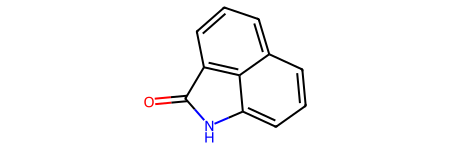

In [8]:
molecules[0]

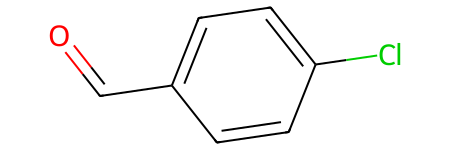

In [9]:
molecules[1]

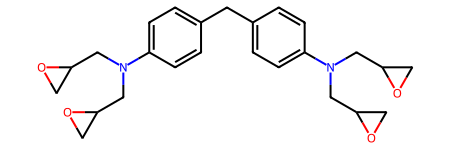

In [10]:
molecules[2]

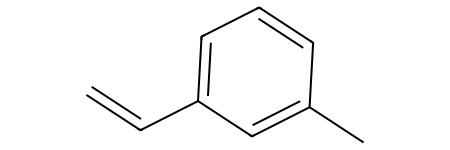

In [11]:
molecules[3]

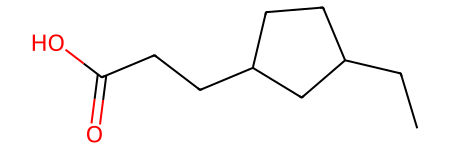

In [12]:
molecules[4]

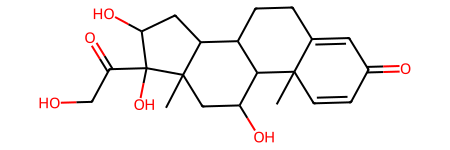

In [13]:
molecules[5]

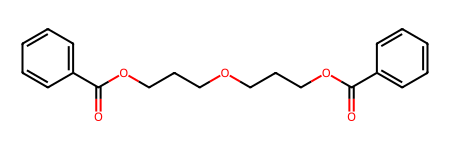

In [14]:
molecules[6]

In [15]:
from smiles_to_tensors import *

In [16]:
test = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(x_smiles=train['Drug'][:6], y=train['Y'][:6])
test

[Data(x=[13, 79], edge_index=[2, 30], edge_attr=[30, 10], y=[1]),
 Data(x=[9, 79], edge_index=[2, 18], edge_attr=[18, 10], y=[1]),
 Data(x=[31, 79], edge_index=[2, 72], edge_attr=[72, 10], y=[1]),
 Data(x=[9, 79], edge_index=[2, 18], edge_attr=[18, 10], y=[1]),
 Data(x=[12, 79], edge_index=[2, 24], edge_attr=[24, 10], y=[1]),
 Data(x=[27, 79], edge_index=[2, 60], edge_attr=[60, 10], y=[1])]

In [32]:
test[1]['edge_index']

tensor([[0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 8],
        [1, 0, 2, 1, 3, 8, 2, 4, 3, 5, 4, 6, 7, 5, 5, 8, 2, 7]])

In [31]:
len(test[1]['x'])

9

In [33]:
test_loader = DataLoader(dataset=test, batch_size=1)
for i in test_loader:
    print(len(i['x']))
    print(i['edge_index'])

13
tensor([[ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  7,
          8,  8,  9,  9, 10, 10, 11, 11, 11, 12, 12, 12],
        [ 1,  0,  2, 11,  1,  3,  2,  4, 12,  3,  5,  4,  6,  5,  7,  6,  8, 12,
          7,  9,  8, 10,  9, 11,  1, 10, 12,  3,  7, 11]])
9
tensor([[0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 8],
        [1, 0, 2, 1, 3, 8, 2, 4, 3, 5, 4, 6, 7, 5, 5, 8, 2, 7]])
31
tensor([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,
          7,  8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15,
         15, 16, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22,
         22, 23, 23, 24, 24, 25, 25, 26, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30],
        [ 1, 14,  0,  2,  1,  3, 12,  2,  4,  8,  3,  5,  4,  6,  7,  5,  7,  5,
          6,  3,  9,  8, 10, 11,  9, 11,  9, 10,  2, 13, 12, 14,  0, 13, 15, 14,
         16, 15, 17, 30, 16, 18, 17, 19, 18, 20, 29, 19, 21, 25, 20, 22, 21, 23,
         24, 22,